<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Projet Data Visualisation</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            background-color: #f9f9f9;
            color: #333;
        }
        h1 {
            text-align: center;
            font-size: 3rem;
            color: #2c3e50;
            margin-bottom: 10px;
        }
        h2 {
            text-align: center;
            font-size: 2rem;
            color: #2980b9;
        }
        p {
            text-align: center;
            font-size: 1.2rem;
            margin: 10px auto;
            line-height: 1.6;
            color: black;
        }
        .container {
            width: 80%;
            margin: 50px auto;
            padding: 20px;
            background-color: #ffffff;
            border: 1px solid #dcdcdc;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }
        .highlight {
            font-weight: bold;
            color: #e74c3c;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Projet Data Visualisation</h1>
        <h2>Cyril Kfouri, Mathias Robert, Maxime Maeder, Luc Renaud, Maxime Lambert</h2>
        <p><span class="highlight">Group 2 - Data and AI</span></p>
        <h2>Données Foncières</h2>
        <p><strong>Objectif:</strong> Solution pour un investisseur immobilier.</p>
    </div>
</body>
</html>


<h1 style="color: #e74c3c; text-align: left; margin-bottom: 50px;">3 - Vizualisation</h1>
<h3 style="color: #e74c3c; text-align: left;">1 - Répartition des variables</h3>
<h2 style="text-align: center; margin-top: 20px; color: #3498db;">A - Redécouverte du DataFrame</h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '../CSV/données_foncières_france_2024.csv'
df = pd.read_csv(file_path, low_memory=False)

In [3]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_nom_voie,nom_commune,code_departement,nombre_lots,type_local,...,surface_terrain,nombre_pieces_principales,nature_culture,nature_culture_speciale,longitude,latitude,valeur_fonciere,surface_tot_lots,nombre_dependances,prix_m2
0,2024-1,2024-01-02,1,Vente,NaN,LE DELIVRE,Chaley,01,0,Terre Agricole,...,99.0,NaN,prés,NaN,5.530952,45.952439,346.5,0.0,0,3.500000
1,2024-2,2024-01-03,2,Vente,NaN,CHEVRY DESSOUS,Chevry,01,0,Terre Agricole,...,115.0,NaN,sols,NaN,6.043339,46.282256,10000.0,0.0,0,86.956522
2,2024-3,2024-01-08,1,Vente,NaN,PIN HAMEAU,Laiz,01,0,Terre Agricole,...,497.0,NaN,sols,NaN,4.911143,46.247235,249000.0,0.0,0,501.006036
3,2024-4,2024-01-03,1,Vente,29.0,PL DU JURA,Gex,01,2,Appartement,...,NaN,4.0,NaN,NaN,6.058695,46.332212,329500.0,0.0,3,3702.247191
4,2024-5,2024-01-09,1,Vente,NaN,AU CHAUME,Plateau d'Hauteville,01,0,Terrain Naturel,...,1584.0,NaN,futaies résineuses,NaN,5.548635,45.900606,20000.0,0.0,0,12.626263


Comprendre a quel type de data frame nous allons devoiur traité (tailles, variables)

In [4]:
df.shape

(6717060, 21)

<h2 style="text-align: center; color: #3498db;">B - Affichage de la répartition des variables pertinentes sur le dataset complet</h2>

In [5]:
def afficher_repartition_categorique(df, colonne_nom):
    plt.figure(figsize=(17, 6))
    sns.countplot(x=df[colonne_nom], hue=df[colonne_nom], palette='Blues_d')
    plt.title(f'Repartition des mutations par {colonne_nom}')  
    plt.xlabel(colonne_nom)  
    plt.ylabel('Nombre de mutations')  
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

In [6]:
def afficher_repartition_numerique(df, colonne_nom):
    plt.figure(figsize=(17, 5))
    sns.kdeplot(df[colonne_nom], fill=True, color='skyblue')
    plt.title(f'{colonne_nom} Distribution')  
    plt.xlabel(colonne_nom)  
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()

<h1 style="margin-top: 100px;">1 - Distribution des dates auxquelles ont été réalisées les transactions</h1>

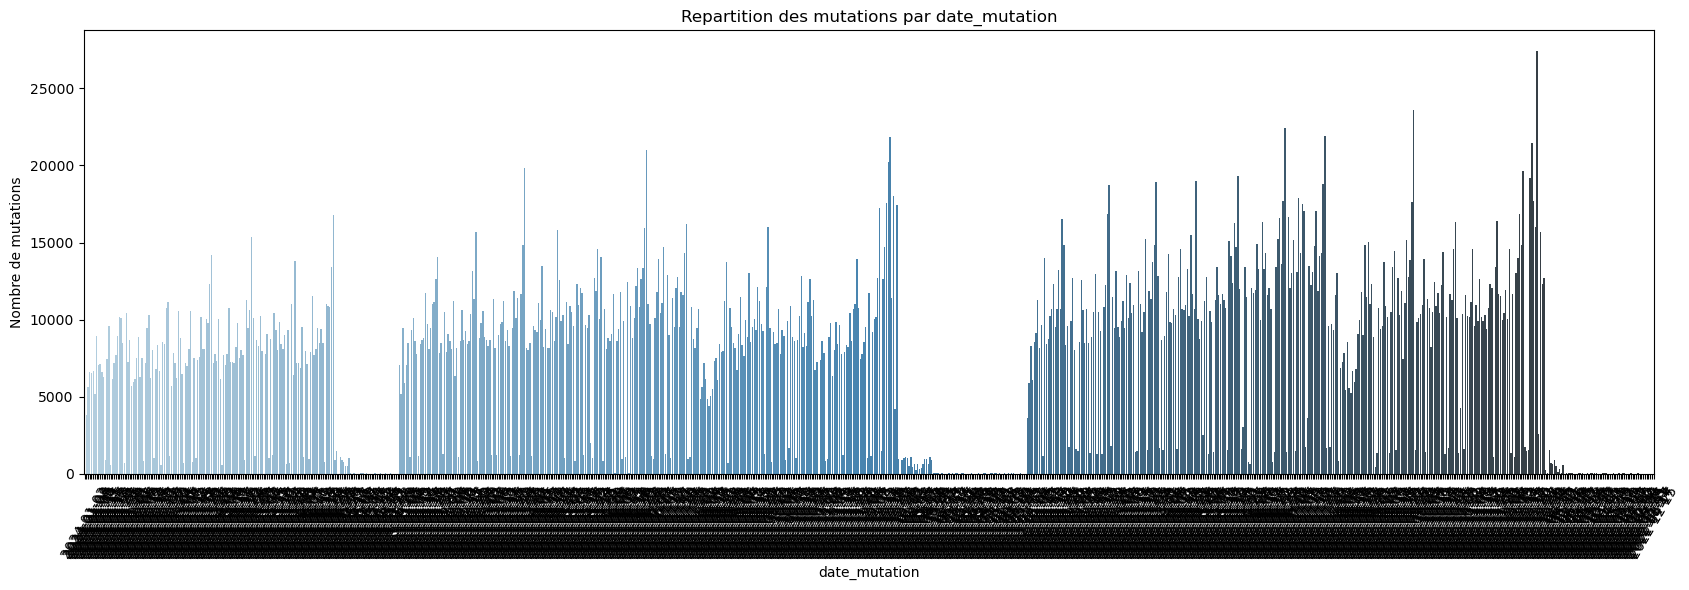

In [7]:
afficher_repartition_categorique(df, 'date_mutation')

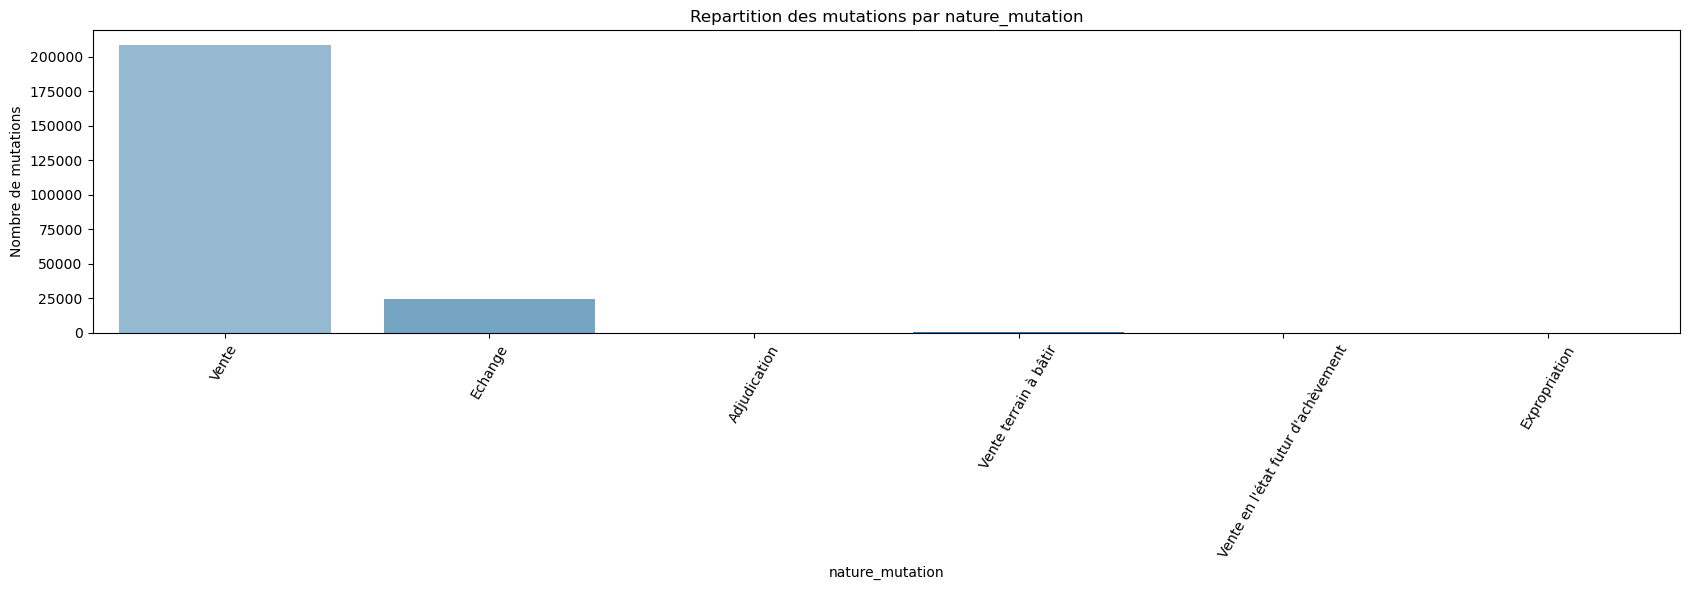

type_local
Terre Agricole                              133257
Terrain Naturel                              67912
Terrain à Bâtir                              15761
Appartement                                   9808
Local industriel. commercial ou assimilé      4109
Maison                                        3031
Name: count, dtype: int64


id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
adresse_numero               203736
adresse_nom_voie                  5
nom_commune                       0
code_departement                  0
nombre_lots                       0
type_local                        0
surface_reelle_bati          216930
surface_terrain                3750
nombre_pieces_principales    216930
nature_culture                 3750
nature_culture_speciale      212791
longitude                         0
latitude                          0
valeur_fonciere                   0
surface_tot_lots                  0
nombre_dependances                0
prix_m2                           0
dtype: int64

In [8]:
df_filtre = df[df['valeur_fonciere'] < 1000]
 
afficher_repartition_categorique(df_filtre, 'nature_mutation')


print(df_filtre['type_local'].value_counts())

df_filtre.isna().sum()


<h1 style="margin-top: 100px;">2 - Distribution du nomnbre de mutation selon chaque département</h1>

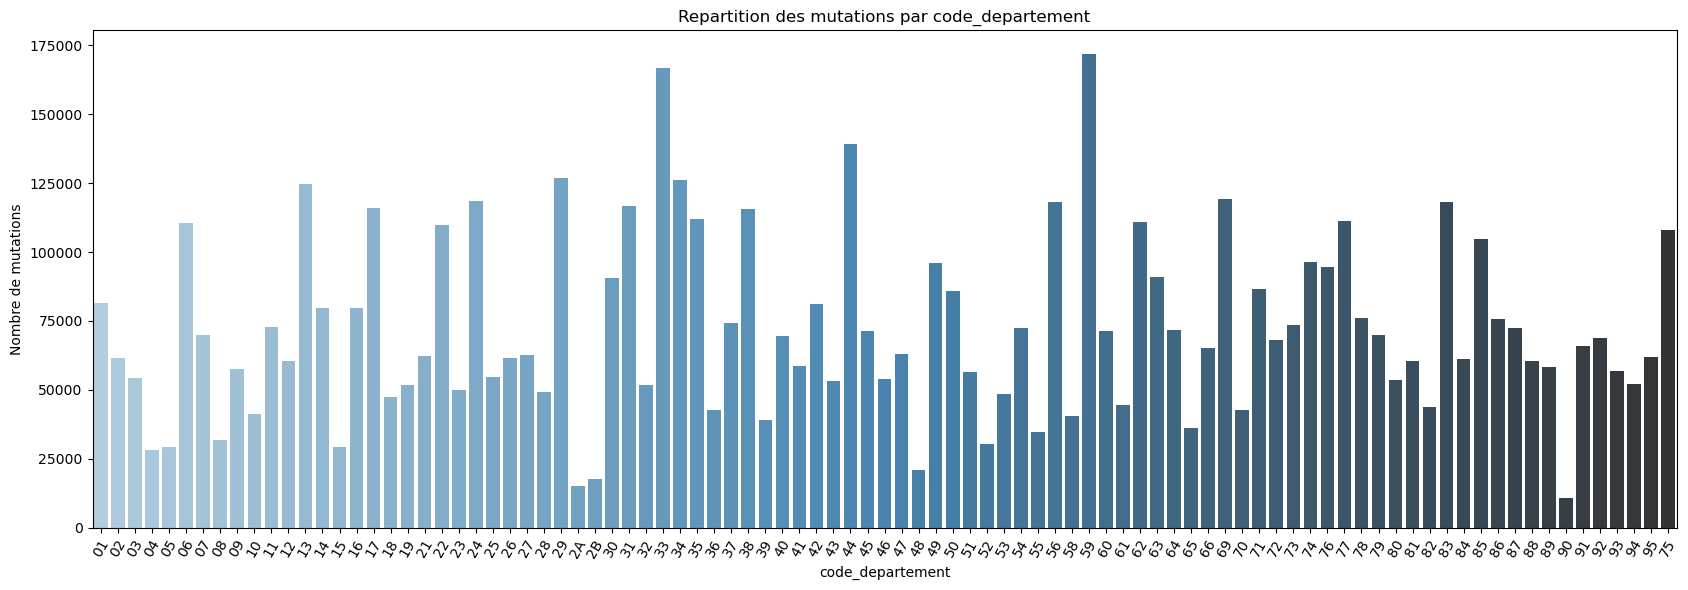

In [9]:
afficher_repartition_categorique(df, 'code_departement')

<h1 style="margin-top: 100px;">3 - Distribution du nomnbre de chaque type de local</h1>

Pour savoir la répartition entre si c'est une maison, un appartement, un local industriel, un terrain ...

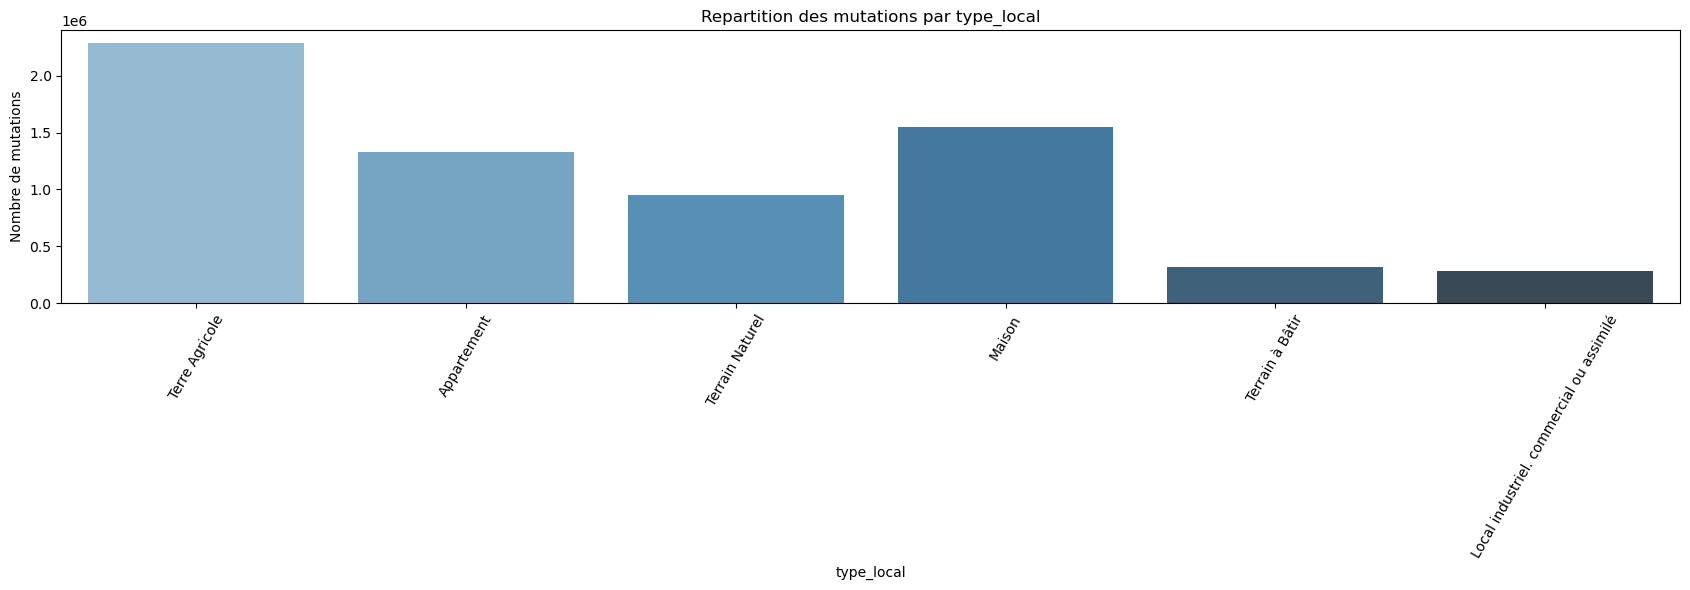

In [10]:
afficher_repartition_categorique(df, 'type_local')

<h1 style="margin-top: 100px;">4 - Distribution de la superficie du batiment</h1>

Ici on pbbserve que la répartition se concentre en dessous des 1 000 m2 et que la moyenne est surement très poussées vers le haut à cause de valeures extremement hautes

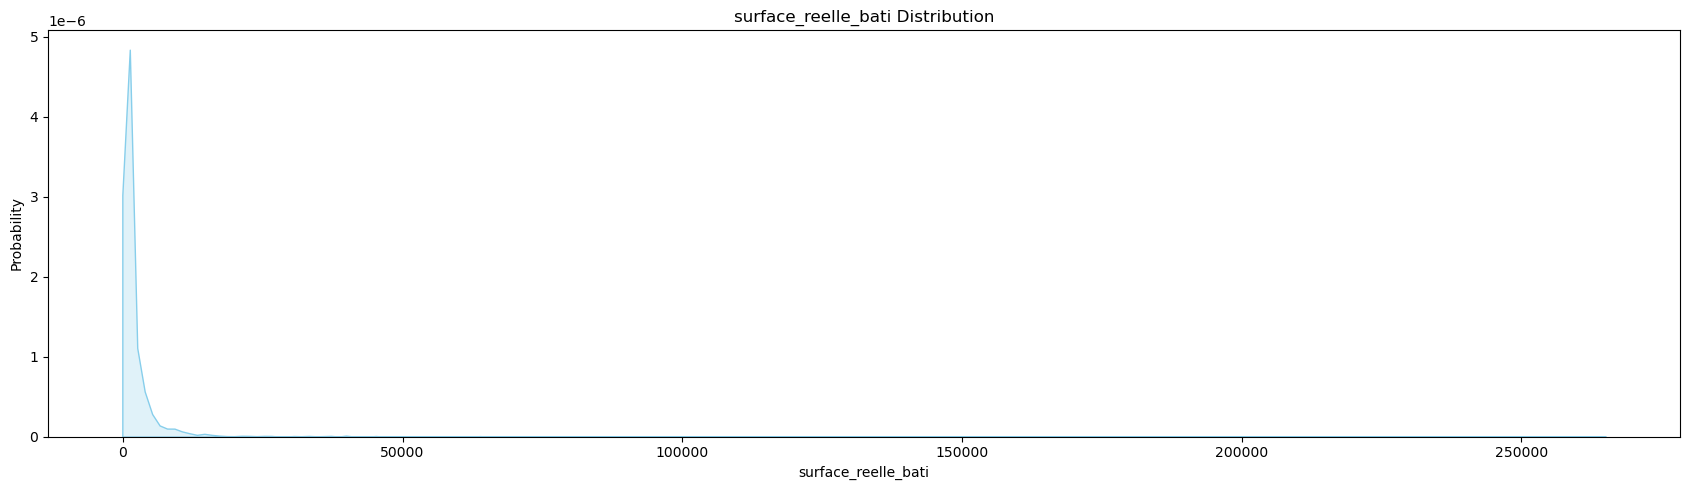

In [11]:
afficher_repartition_numerique(df, 'surface_reelle_bati')

On affiche donc les données sur un plus petit interval pour plus de compréhension

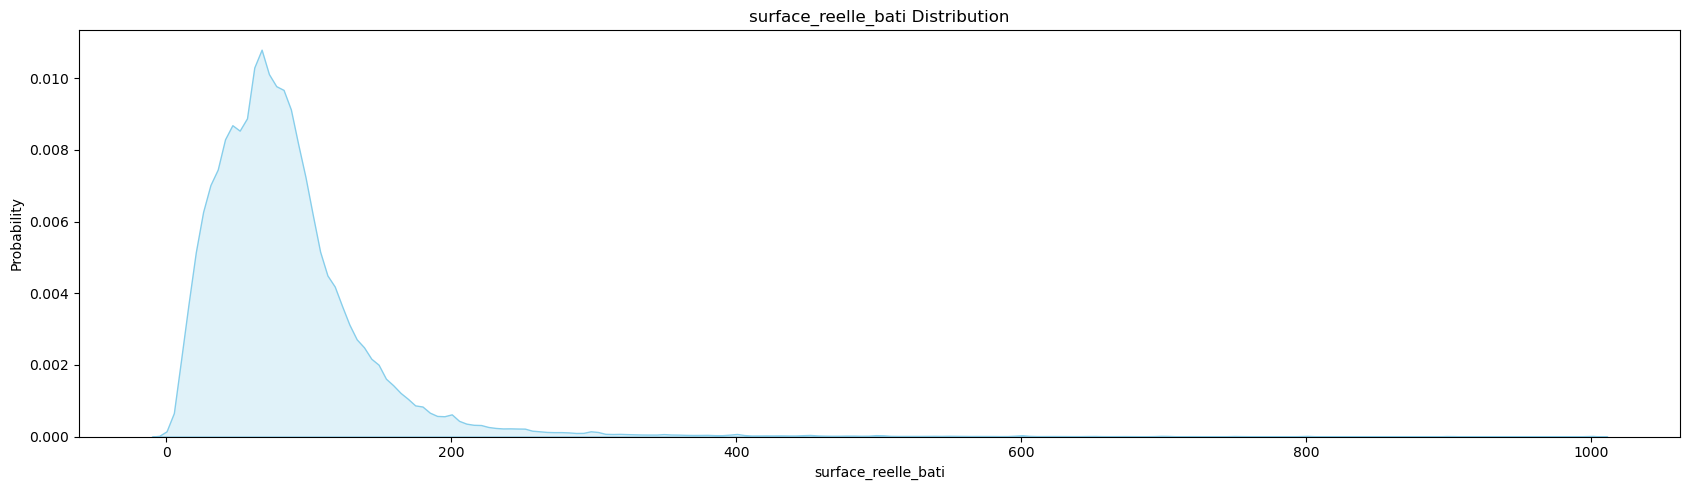

In [12]:
surface_bati_jusqua_1k_m2 = df[(df['surface_reelle_bati'] >= 0) & (df['surface_reelle_bati'] <= 1_000)]

afficher_repartition_numerique(surface_bati_jusqua_1k_m2, 'surface_reelle_bati')


<h1 style="margin-top: 100px;">5 - Distribution de la superficie du terrain</h1>

Ici on pbbserve que la répartition se concentre en dessous des 1 000 m2 et que la moyenne est surement très poussées vers le haut à cause de valeures extremement hautes

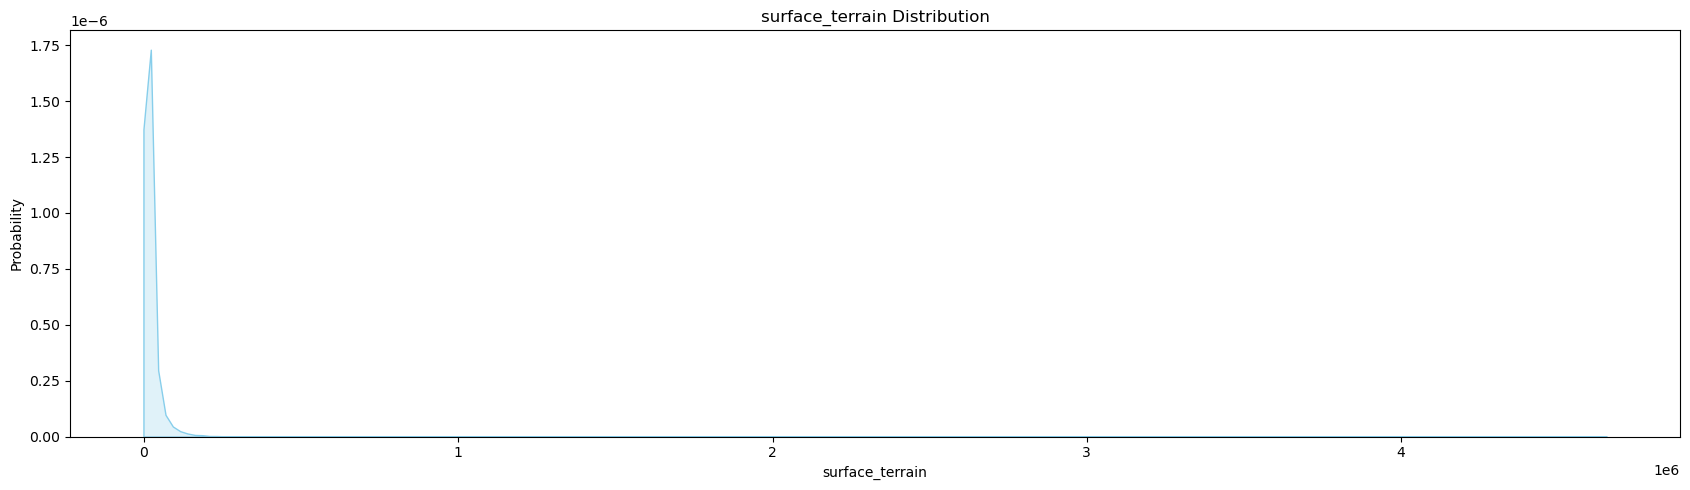

In [13]:
afficher_repartition_numerique(df, 'surface_terrain')

On affiche donc les données sur un plus petit interval pour plus de compréhension

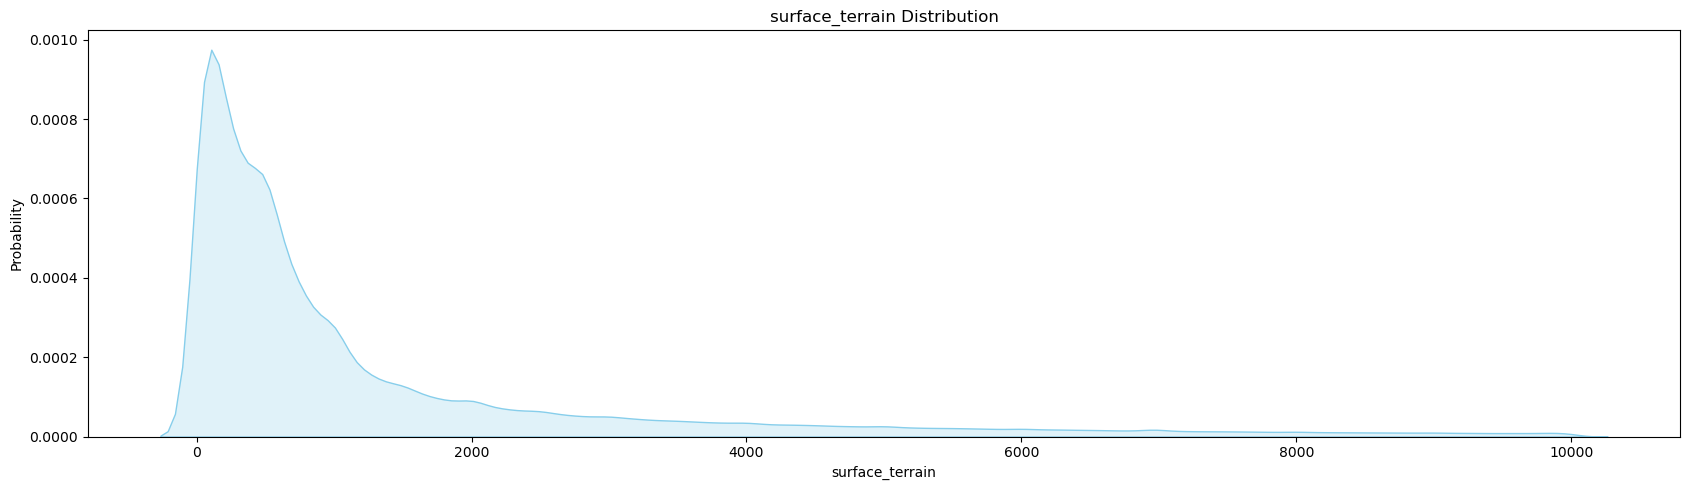

In [14]:
surface_terrain_jusqua_10k_m2 = df[(df['surface_terrain'] >= 0) & (df['surface_terrain'] <= 10_000)]
afficher_repartition_numerique(surface_terrain_jusqua_10k_m2, 'surface_terrain')


<h1 style="margin-top: 100px;">6 - Distribution du nombre de pièces</h1>

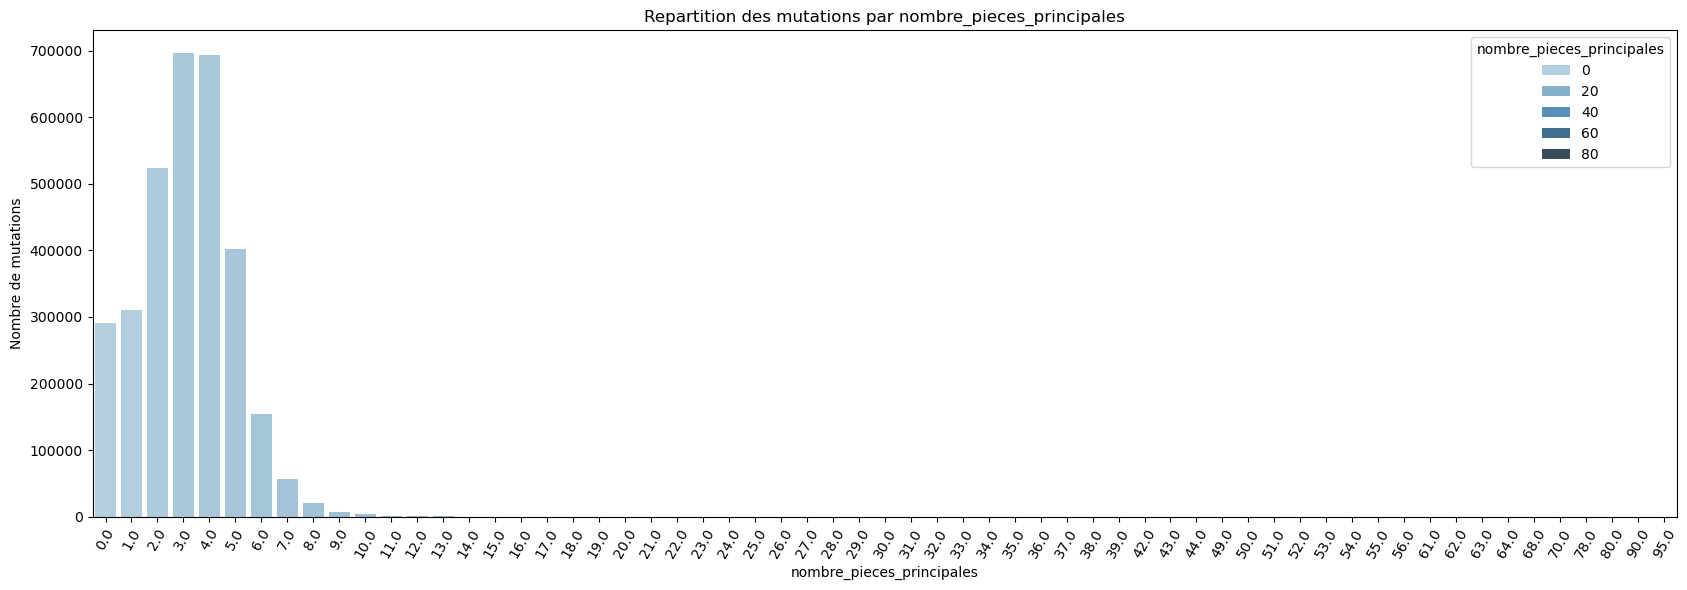

In [15]:
afficher_repartition_categorique(df, 'nombre_pieces_principales')

<h1 style="margin-top: 100px;">7 - Répartition des zones culturelles</h1>

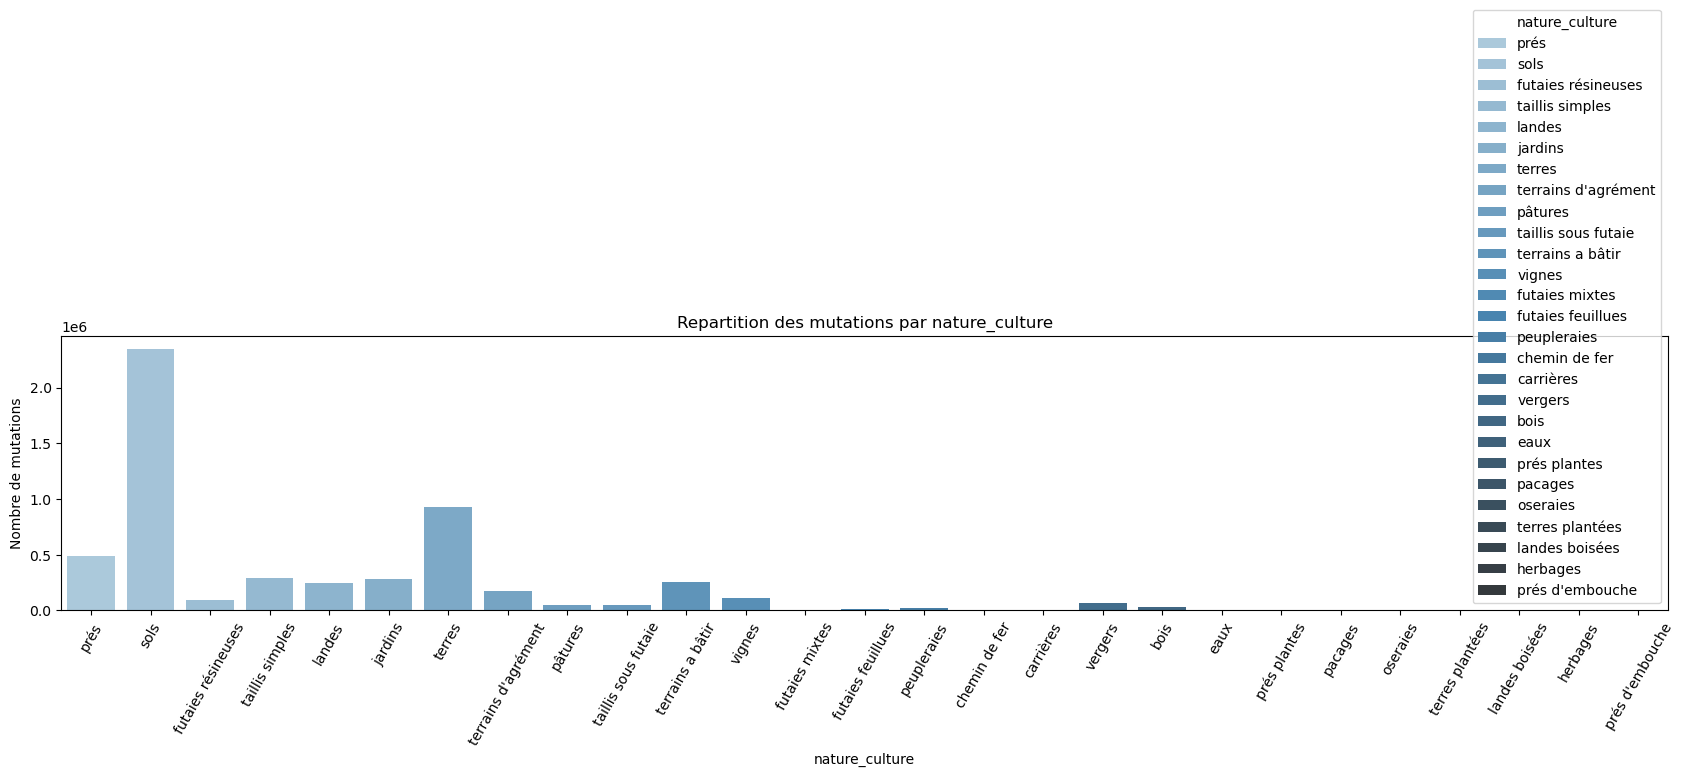

In [16]:
afficher_repartition_categorique(df, 'nature_culture')

<h1 style="margin-top: 100px;">8 - Répartition des mutations depuis l'Espace</h1>

On observe une représentation de la France, qui explique une répartition des mutations dans toutes la France en bonne quantité

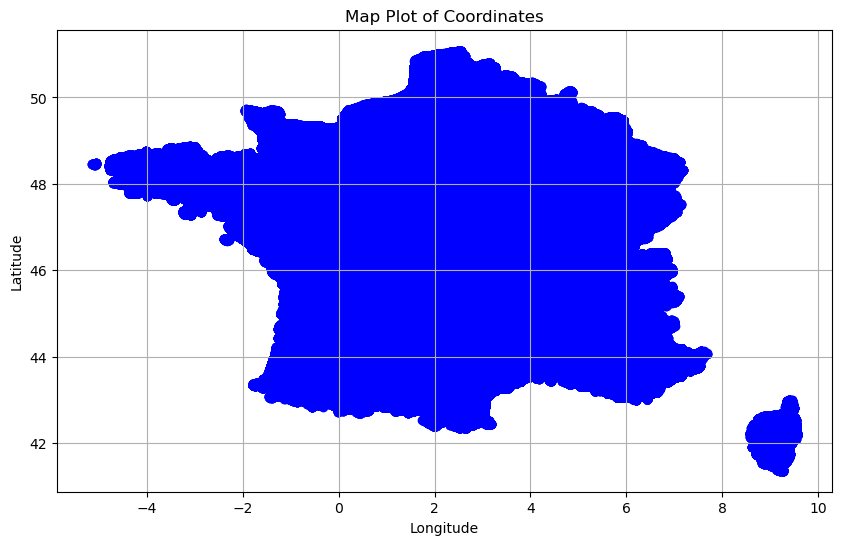

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], color='blue', marker='o')

plt.title('Map Plot of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(True)
plt.show()


<h1 style="margin-top: 100px;">9 - Affichage des départements dans la France</h1>

In [18]:
import folium
import requests
from shapely.geometry import shape

# Centre de la France
center_lat, center_lon = 46.603354, 1.888334

# Créer une carte centrée
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Charger le fichier GeoJSON des départements
geojson_url = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
geojson_data = requests.get(geojson_url).json()

# Ajouter les contours des départements
folium.GeoJson(
    geojson_data,
    name='Départements',
    style_function=lambda x: {
        'fillColor': 'blue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.2
    }
).add_to(m)

# Ajouter les numéros des départements au centroïde
for feature in geojson_data['features']:
    # Récupérer le numéro du département
    code_departement = feature['properties']['code']

    # Calculer le centroïde géométrique
    geometry = shape(feature['geometry'])  # Convertir en objet Shapely
    centroid = geometry.centroid
    center_lat, center_lon = centroid.y, centroid.x

    # Ajouter un DivIcon pour le numéro du département
    folium.map.Marker(
        [center_lat, center_lon],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 12px; color: red; font-weight: bold;">{code_departement}</div>'
        )
    ).add_to(m)

# Ajouter le contrôle de couches
folium.LayerControl().add_to(m)

# Afficher la carte
m


<h1 style="margin-top: 100px;">10 - Distribution du Prix de la mutation</h1>

Ici on pbbserve que la répartition se concentre en dessous des 5 millions d'euros pour la très très grande makorité et que la moyenne est surement très poussées vers le haut à cause de valeures extremement hautes comme vu dans l'analyse statistique précédente

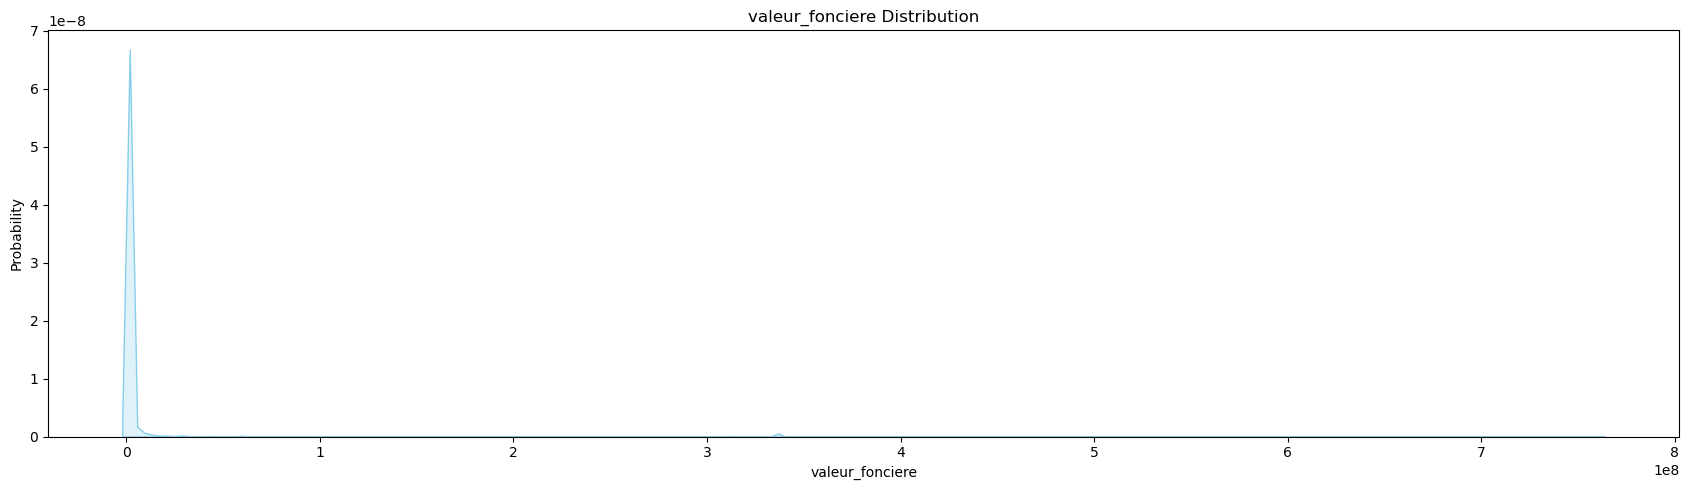

In [19]:
afficher_repartition_numerique(df, 'valeur_fonciere')

On affiche donc les données sur un plus petit interval pour plus de compréhension

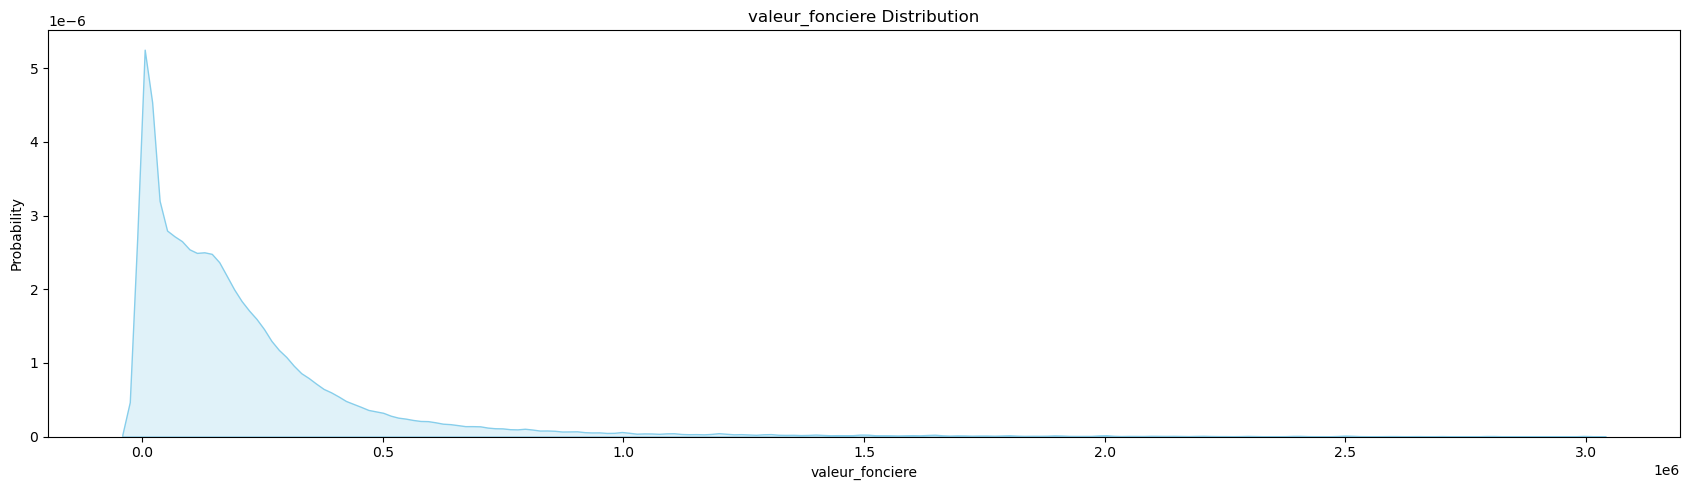

In [20]:
prix_jusqua_3_millions = df[(df['valeur_fonciere'] >= 0) & (df['valeur_fonciere'] <= 3_000_000)]

afficher_repartition_numerique(prix_jusqua_3_millions, 'valeur_fonciere')
